In [ ]:
 import numpy as np
import matplotlib.pyplot as plt

#Explicit 1D

In [ ]:
#Initializing all values

L = 0.5
alpha = 97*10**-6                   #Taking thermal diffusvity of aluminium.
N = 50                              #Nodes

x = np.linspace(0, L, N+1)
dx = x[1] - x[0]

T = np.zeros(N+1)
dt=0.9 *(0.5*dx**2/alpha)               #By stability condition
t=0                                 #At initial time
F=dt*alpha/dx**2

In [ ]:
T1=100
T2=10

In [ ]:
T_new = np.zeros(N+1)

In [ ]:
T_0=np.linspace(20,40,N+1)              #Initial condition

In [ ]:
T_all=[]
T_all.append(T_0)
while t<500:                                    #Considering final time as 500    
  T_new[0]=T1
  T_new[N]=T2
  for i in range(1,N):
    T_new[i]=T_0[i]+F*(T_0[i+1]+T_0[i-1]-2*T_0[i])
  t=t+dt
  T_0=T_new.copy()
  T_all.append(T_0)


In [ ]:
len(T_all)

1079

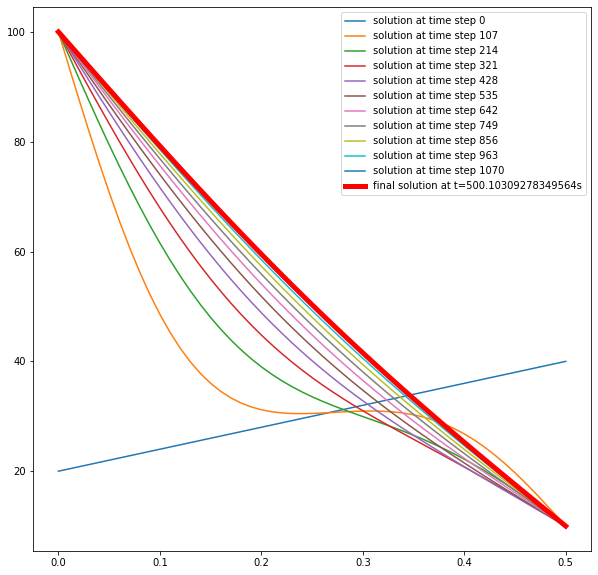

In [ ]:
num=len(T_all)

fig,ax=plt.subplots(figsize=(10,10))
for i in range(0,num,int(num/10)):
  ax.plot(x,T_all[i],label="solution at time step "+str(i))
  ax.legend()
ax.plot(x,T_all[-1],'r',linewidth=5.0,label="final solution at t="+str(t)+"s")
ax.legend()



#Explicit 2D Solution

In [ ]:
#Initializing all values

Lx = 1
Ly = 1
alpha = 97*10**-6                   #Taking thermal diffusvity of aluminium.
N = 50                                                #50 nodes

x = np.linspace(0, Lx, N+1)
y = np.linspace(0, Ly, N+1)
dx=x[1]-x[0]
dy=y[1]-y[0]


dt=0.9 *(0.5*dx**2/alpha)*0.1
t=0
Fx=dt*alpha/dx**2
Fy=dt*alpha/dy**2

T_top=100
T_bottom=10
T_left=np.linspace(T_top,T_bottom,N+1)
T_right=T_left

In [ ]:
T_new = np.zeros((N+1,N+1))                                #Used for updating

In [ ]:
#Initial Condition
T_0=np.array([[0]*(N+1)]*(N+1))

In [ ]:
T_all=[]                                                      #Stores all the updated values
T_all.append(T_0)
while t<1500:                                                 #Considering final time as 1500
  T_new[:,0]=T_left
  T_new[:,-1]=T_right
  T_new[0,:]=T_top
  T_new[-1,:]=T_bottom
  for i in range(1,N):
    for j in range(1,N):
      T_new[i][j]=T_0[i][j]*(1-2*Fx-2*Fy)+Fx*(T_0[i+1][j]+T_0[i-1][j])+Fy*(T_0[i][j+1]+T_0[i][j-1])
  t=t+dt
  T_0=T_new.copy()
  T_all.append(T_0)

In [ ]:
num1=len(T_all)

In [ ]:
from mpl_toolkits import mplot3d
def surface_wireframe(DATA,TITLE,c):
  #Grid Formation for 3D plot
  Xg,Yg=np.meshgrid(x,y)
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_wireframe(Xg, Yg, DATA, color=c)
  ax.set_title(TITLE) 
  ax.legend
 
  plt.show()

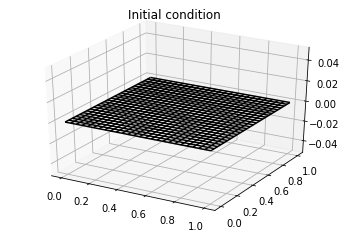

In [ ]:
#Plotting for initial condition
surface_wireframe(T_all[0],"Initial condition",'black')

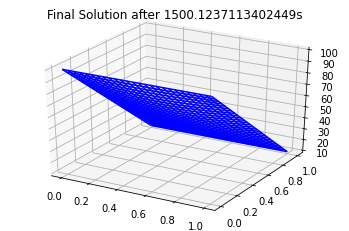

In [ ]:
#Plotting for final Solution
surface_wireframe(T_all[-1],"Final Solution after "+str(t)+"s",'blue')

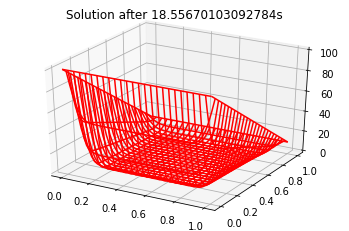

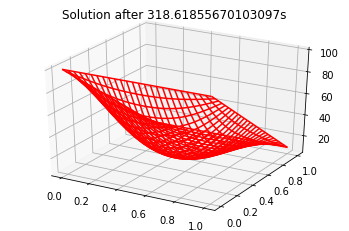

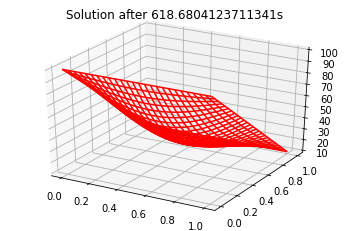

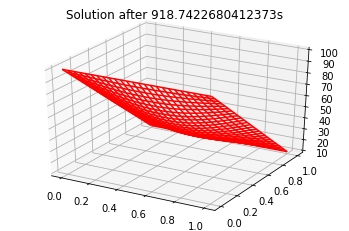

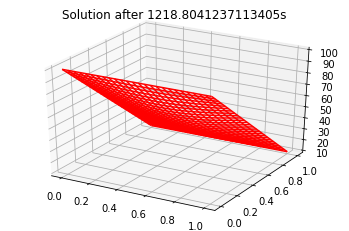

In [ ]:
#Plotting for 5 in between solutions

for i in range(100,int(num1*.9),int(num1/5)):
  DATA=T_all[i]
  TIME=i*dt
  TITLE="Solution after "+str(TIME)+"s"
  surface_wireframe(DATA,TITLE,'red')